In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import pandas as pd

def lorentzian(ppm, pars):
    #pars = np.array(pars)
    pools = int(len(pars)/3)
    freqs = len(ppm)
    # 1) Preallocate output
    L = np.zeros( (freqs,pools) )
    for pool in np.arange(0,pools,1):
        P = pars[pool::pools]
        fwhm = P[1]**(2/4)
        L[:,pool] = P[0]*fwhm / (fwhm + (ppm - P[2])**2 )
    
    return np.sum(L,1)

def fit_lorentzian(xdata, ydata, x0, LB, UB):
    
    # define function to estimate residuals
    def res(par_guess):
        yhat = lorentzian(xdata, par_guess)
        return yhat - ydata
    
    # fitting
    res_1 = least_squares(res, x0, bounds= (LB,UB), method='trf')
    
    return res_1.x
    

### Simulate Data with Noise

In [2]:
ppm = np.arange(-10,11,.5)
p = [1,.5,2,1.5,0,5]
L =  np.random.rand(len(ppm))*.15 + lorentzian(ppm,p)

In [13]:
P = pd.DataFrame(p,index=['Amp1','Amp2','Width1','Width2','Center1','Center2'],columns=['Simulated'])
P

,Simulated
Amp1,1.0
Amp2,0.5
Width1,2.0
Width2,1.5
Center1,0.0
Center2,5.0


### Fitting Data

In [17]:
par_pred = fit_lorentzian(ppm, L, [1,1,1,1,0,4], [0,0,0,0,-2,3], [1,1,3,5,3,6])

### Plots predictions and observed

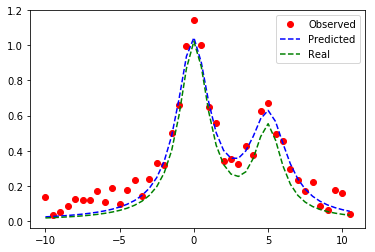

In [18]:
plt.plot(ppm,L,'or')
plt.plot(ppm,lorentzian(ppm,par_pred),'--b')
plt.plot(ppm,lorentzian(ppm,p),'--g')
plt.legend(['Observed','Predicted','Real'])

In [19]:
P['Fitted'] = par_pred.round(1)
P

,Simulated,Fitted
Amp1,1.0,1.0
Amp2,0.5,0.6
Width1,2.0,3.0
Width2,1.5,5.0
Center1,0.0,-0.1
Center2,5.0,5.0
